# Variable selection for ESR1, ERBB2, CDK1, CDK4

We use XGBoost to predict the expression of a gene based on the expression of the other genes in the cell.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import src.modules as modules
import src.data_handling as dh

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_pickle("/data/severs/reduced_data_sets/Cancer.pkl")

In [4]:
from ITMO_FS.filters import gini_index , select_k_best, UnivariateFilter

In [6]:
X = df.drop("ESR1", axis=1)

In [7]:
Y = df.ESR1

In [14]:
from ITMO_FS.filters.univariate import gini_index

In [35]:
X = X.fillna(X.median())

In [36]:
scores = gini_index(X.values, Y.values)

In [37]:
scores.min()

0.6714465632455504

In [38]:
scores.max()

0.7427758809231494

In [12]:
selector = UnivariateFilter(gini_index, select_k_best)
trX = selector.fit_transform(X.values, Y.values)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [123]:
df_corr_ESR1, kept_genes = dh.compute_p_value(df, "CDK4", verbose=1)

Counting NaNs:


  0%|          | 0/28634 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/28634 [00:00<?, ?it/s]

In [154]:
df_corr_CDK1 = dh.remove_high_nan(df_corr_ESR1)

In [169]:
selected_CDK1 = dh.select_by_alpha(df_corr_CDK1)

Selected 1008 input genes with alpha = 0.005


In [168]:
selected_CDK1.shape

(1008, 3)

In [163]:
alpha = 0.004943561262168797
import re
s = str(alpha)
zeros = len(re.search('\d+\.(0*)', s).group(1))

In [166]:
round(alpha, zeros+1)

0.005

In [160]:
selected_CDK1

,correlation,p-value,n_non_NaNs
Genes,,,
AURKAIP1,0.043847,7.085884e-05,12950.0
CCNL2,-0.045111,3.693584e-05,12950.0
MRPL20,0.042441,1.459431e-04,12950.0
CDK11A,-0.039669,5.321351e-04,12950.0
RPL22,0.067016,1.736631e-11,12950.0
...,...,...,...
MT-ND4L,-0.050223,2.012679e-06,12950.0
MT-ND4,-0.050471,1.732614e-06,12950.0
MT-ND5,-0.044370,5.454620e-05,12950.0


In [136]:
alphas = np.logspace(-20,-2,1000)
n_selected_variables = []
for p in alphas:
    n_selected_variables.append(np.where(df_corr_ESR1["p-value"]<p)[0].shape[0])
n_selected_variables = np.array(n_selected_variables)

In [172]:
a = [1,2,3,4]
b = ["a", "b", "c", "d"]
for c, d in zip(a,b):
    print(c, d)

1 a
2 b
3 c
4 d


In [125]:
np.where(n_selected_variables<2000)[0][-1]

999

In [126]:
n_selected_variables[365]

41

In [127]:
alphas[365].round(14)

4e-14

In [128]:
str(4e-14)

'4e-14'

Text(0.5, 1.0, 'Number of input genes for different alpha limits')

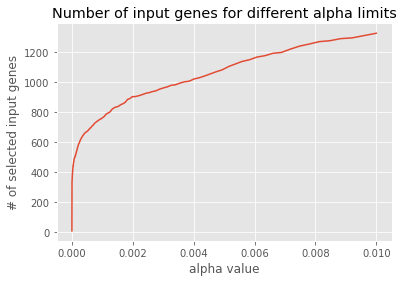

In [129]:
plt.style.use("ggplot")
plt.plot(alphas, n_selected_variables)
plt.xlabel("alpha value")
plt.ylabel("# of selected input genes")
plt.title("Number of input genes for different alpha limits")

In [72]:
np.where(df_corr_ESR1["p-value"]<0.00000005)[0].shape[0]

2045

In [69]:
df_corr_ESR1["p-value"][2000] == 0.00000003608143349812892

True

In [66]:
3.9433577381787696e-14

3.9433577381787696e-14

# ERBB2

In [ ]:
correlation, p_values, n = compute_correlation(df, "ERBB2", fdr=True)

In [ ]:
correlation_abs = abs(correlation)

In [ ]:
ERBB2_df_ = create_corr_df(correlation, n, p_values, df.columns)

In [ ]:
selected_ERBB2, corr_df = variable_selector(ERBB2_df_)

In [ ]:
corr_df.sort_values("Correlation")

In [ ]:
inds = []
for i, ind in enumerate(ERBB2_df.index):
    if ind in selected_ERBB2:
        inds.append(i)

In [ ]:
mean_genes = df[ERBB2_df.index].mean()

In [ ]:
mean_genes[sorter]

In [ ]:
mean_genes_levels = pd.cut(mean_genes, bins=[-99,-0.1,0.1,99],labels=["-1","0","0.5"])

In [ ]:
mean_genes_levels  = pd.to_numeric(mean_genes_levels)

In [ ]:
(mean_genes_levels>0.1).sum()

In [ ]:
ERBB2_df = create_corr_df(correlation, n, p_values, df.columns)

In [ ]:
selected_inds = []
for i, ind in enumerate(ERBB2_df.index):
    if ind in selected_ERBB2:
        selected_inds.append(i)

In [ ]:
excluded_inds = []
for i, ind in enumerate(ERBB2_df.index):
    if ind not in selected_ERBB2:
        excluded_inds.append(i)

In [ ]:
ERBB2_df.to_pickle("/data/severs/ERBB2_correlation_p_values.pkl")

In [ ]:
ERBB2_input_variables_correct = complete_variable_selector(df, "ESR1")

In [ ]:
correlation[inds].max()

In [ ]:
np.argmax(correlation[inds])

In [ ]:
df.columns[inds[803]]

In [ ]:
abs(correlation[inds]).min()

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(dpi=120)
sorter = np.argsort(p_values)
colors = n
sc = ax.scatter(mean_genes[excluded_inds],(correlation[excluded_inds]), s=0.6, label="Excluded", c="red", cmap="Set1", alpha=1)
sc = ax.scatter(mean_genes[selected_inds],(correlation[selected_inds]), s=0.6, label="Selected", c="black", cmap="Set1", alpha=1)

#ax.scatter(np.arange(28635),p_values[sorter]*2, s=0.3, label="FDR p-values", color="orange")
#ax.plot((10000,10000), (0, 1), color="r", linestyle="--", label= "0.05 p-value")
ax.set_ylim((-0.6,0.6))
#ax.set_ylim((-0.01,0.3))
#ax.set_xlim((-100,2000))
fig.tight_layout()
ax.set_title("Selected variables' correlation vs average expression ERBB2")
ax.set_ylabel("Correlation")
ax.set_xlabel("Average expression")
ax.legend()

In [ ]:
fig, ax = plt.subplots(dpi=120)
sorter = np.argsort(p_values)
colors = n[sorter]
sc = ax.scatter(np.arange(28635),abs(correlation[sorter]), s=0.6, label="|Correlaton|", c=colors)
ax.scatter(np.arange(28635),p_values[sorter]*2, s=0.3, label="FDR p-values", color="orange")
#ax.plot((10000,10000), (0, 1), color="r", linestyle="--", label= "0.05 p-value")
ax2 = ax.twinx()
ax2.set_ylim((-0.01,1.01))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelright=False) # labels along the bottom edge are off
ax.set_ylim((-0.01,0.3))
ax.set_xlim((-100,2000))
plt.colorbar(sc)
fig.tight_layout()
ax.set_title("Gene count, correlation, and FDR p-values for every gene in relation to ERBB2")
ax.set_ylabel("Correlation & p-value")
ax.set_xlabel("Sorted by p-value")
ax.legend()

In [ ]:
fig, ax = plt.subplots(dpi=120)
sorter = np.argsort(p_values)
colors = n[sorter]
sc = ax.scatter(np.arange(28635),abs(correlation[sorter]), s=0.6, label="|Correlaton|", c=colors)
ax.scatter(np.arange(28635),p_values[sorter]*2, s=0.3, label="FDR p-values", color="orange")
ax.plot((10000,10000), (0, 1), color="r", linestyle="--", label= "0.05 p-value")
ax2 = ax.twinx()
ax2.set_ylim((-0.01,1.01))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelright=False) # labels along the bottom edge are off
ax.set_ylim((-0.01,1.01))
plt.colorbar(sc)
fig.tight_layout()
ax.set_title("Gene count, correlation, and FDR p-values for every gene in relation to ERBB2")
ax.legend()

In [ ]:
df_new.sort_values("cor_pearson")

# CDK1

In [ ]:
correlation_cdk1, p_values_cdk1, n_cdk1 = compute_correlation(df, "CDK1", fdr=True)

In [ ]:
CDK1_df = create_corr_df(correlation, n, p_values, df.columns)

In [ ]:
CDK1_df.to_pickle("/data/severs/CDK1_correlation_p_values.pkl")

In [ ]:
CDK1_input_variables = variable_selector(CDK1_df)

# CDK4

In [ ]:
CDK4_input_variables = complete_variable_selector(df, "CDK4", save_corr_to_pickle="/data/severs/CDK4_correlation_p_values.pkl")

# ESR1

In [ ]:
correlation_ESR1, p_values_ESR1, n_ESR1 = compute_correlation(df, "ESR1", fdr=True)

In [ ]:
big_genes = ["ANKRD30A", "STC2", "TFF3", "GFRA1"]

In [ ]:
for gene in big_genes:
    print(f"{gene}: {df[gene].corr(df['GFRA1']):.4f}")

In [ ]:
df[].corr(df[df.columns[i]])

In [ ]:
corr_df_ESR1 = create_corr_df(correlation_ESR1, n_ESR1, p_values_ESR1, df.columns)

In [ ]:
corr_df_ESR1.loc["PDZK1"]["Correlation"]

In [ ]:
selected_ESR1 = variable_selector(corr_df_ESR1)

In [ ]:
inds_ESR1 = []
for i, ind in enumerate(corr_df_ESR1.index):
    if ind in selected_ESR1[0]:
        inds_ESR1.append(i)

In [ ]:
mean_genes_ESR1 = df[corr_df_ESR1.index].mean()

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(dpi=120)
sorter = np.argsort(p_values_ESR1)
colors = n_ESR1
sc = ax.scatter(mean_genes_ESR1[inds_ESR1],(correlation_ESR1[inds_ESR1]), s=0.6, label="Correlation", c=colors[inds_ESR1], cmap="Set1", alpha=0.5)
#ax.scatter(np.arange(28635),p_values[sorter]*2, s=0.3, label="FDR p-values", color="orange")
#ax.plot((10000,10000), (0, 1), color="r", linestyle="--", label= "0.05 p-value")
ax2 = ax.twinx()
ax.set_ylim((-0.3,0.3))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelright=False) # labels along the bottom edge are off
#ax.set_ylim((-0.01,0.3))
#ax.set_xlim((-100,2000))
plt.colorbar(sc, cmap="seismic")
fig.tight_layout()
ax.set_title("Gene count, correlation, and FDR p-values for every gene in relation to ERBB2")
ax.set_ylabel("Correlation")
ax.set_xlabel("Average expression")
ax.legend()

In [ ]:
corr_sorter_ESR1 = np.argsort(abs(correlation_ESR1[NAN_ex]))

In [ ]:
NAN_ex

In [ ]:
np.abs(correlation_ESR1[NAN_ex][corr_sorter_ESR1])

In [ ]:
correlation_ESR1[NAN_ex].min()

In [ ]:
df.columns[NAN_ex][corr_sorter_ESR1][-20:]

In [ ]:
fig, ax = plt.subplots(figsize=(4,6), dpi=200)
ax.barh(np.linspace(0,40,20), (correlation_ESR1[NAN_ex][corr_sorter_ESR1][-21:-1]), align='center', height=1)
ax.set_yticks(np.linspace(0,40,20))
ax.set_yticklabels(df.columns[NAN_ex][corr_sorter_ESR1][-21:-1]);
ax.set_xlabel("Correlation")
ax.set_title("20 highest correlated genes with ESR1")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
df['CTD-2527I21.14'].isnull().sum()

In [ ]:
highest_correlated = []
for c in correlation_ESR1[NAN_ex][corr_sorter_ESR1][-20:]:
    highest_correlated.append(np.where(correlation_ESR1 == c)[0][0])

In [ ]:
df.iloc[:,highest_correlated]

In [ ]:
NAN_ex = np.where(n_ESR1>0.8*n_ESR1.max())[0]

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi=200)
sorter = np.argsort(p_values_ESR1)
colors = n_ESR1[sorter].copy()
colors[-2] = 0
sc = ax.scatter(np.arange(28635),abs(correlation_ESR1[sorter]), s=0.6, label="|Correlation|", c=colors)
ax.scatter(np.arange(28635),p_values_ESR1[sorter]*2, s=0.3, label="FDR p-values", color="orange")
ax.plot((10000,10000), (0, 1), color="r", linestyle="--", label= "0.05 p-value")
ax2 = ax.twinx()
ax2.set_ylim((-0.01,1.01))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelright=False) # labels along the bottom edge are off
ax.set_ylim((-0.01,1.01))
ax.set_xlabel("Genes sorted by FDR p-value")
ax.set_ylabel("Correlation & p-value")
cb = plt.colorbar(sc, label="nGene")
fig.tight_layout()
ax.set_title("Input variables' correlation with ESR1")
ax.legend()

In [ ]:
ESR1_df = create_corr_df(correlation_ESR1, n_ESR1, p_values_ESR1, df.columns)

In [ ]:
CDK4_input_variables = complete_variable_selector(df, "ESR1", save_corr_to_pickle="/data/severs/ESR1_correlation_p_values.pkl")

In [ ]:
arr = np.arange(10)
np.random.shuffle(arr)

In [ ]:
inds = np.arange(11)
np.random.shuffle(inds)
train_mask = np.array([np.arange(11)<int(10*0.8)])

In [ ]:
inds

In [ ]:
train_mask